# CIAA-CIAA First Network
In this notebook we are trying out some data science methods with the CIAA-CIAA dataset.
###### written by Nils Dyck, 19.10.2022

In [1]:
# import packages
import pandas as pd
import sys
import networkx as nx 
import matplotlib.pyplot as plt

%matplotlib inline

print(f"Python version {sys.version}")
print(f"networkx version: {nx.__version__}")

# set datapath and separation parameter
datapath = "../data/processed/CIAA-CIAA.csv"
sep_parameter = ';'

# read data as data
data = pd.read_csv(datapath, sep = sep_parameter)

data.head()

Python version 3.9.12 (main, Apr  5 2022, 01:53:17) 
[Clang 12.0.0 ]
networkx version: 2.7.1


,Name,Title,Co-Authors,Pagintation,Published in
0,Yuan Gao,In Memoriam Sheng Yu.,Kai Salomaa,"[<span itemprop=""pagination"">1-4</span>]","[<meta content=""2012"" itemprop=""datePublished""/>]"
1,Kai Salomaa,In Memoriam Sheng Yu.,Yuan Gao,"[<span itemprop=""pagination"">1-4</span>]","[<meta content=""2012"" itemprop=""datePublished""/>]"
2,Janusz A. Brzozowski,In Search of Most Complex Regular Languages.,NaN,"[<span itemprop=""pagination"">5-24</span>]","[<meta content=""2012"" itemprop=""datePublished""/>]"
3,Andrzej Ehrenfeucht,A Formal Framework for Processes Inspired by t...,Grzegorz Rozenberg,"[<span itemprop=""pagination"">25-27</span>]","[<meta content=""2012"" itemprop=""datePublished""/>]"
4,Grzegorz Rozenberg,A Formal Framework for Processes Inspired by t...,Andrzej Ehrenfeucht,"[<span itemprop=""pagination"">25-27</span>]","[<meta content=""2012"" itemprop=""datePublished""/>]"


For easier use we clean up the co-author-strings a little bit.

In [2]:
co_authors = data['Co-Authors'].tolist()
for i in range(len(co_authors)):
    co_authors[i] = str(co_authors[i]).split(', ')
authors = data['Name'].tolist()
for i in range(len(co_authors)):
    for j in range(len(co_authors[i])):
        co_authors[i][j] = co_authors[i][j].replace('nan', '')
#co_authors

Let us create the co-author network graph:

In [3]:
#Initiate network-graph
G = nx.Graph()
#G.add_nodes_from(authors)
for i in range(len(authors)//10):
    for j in range(len(co_authors[i])):
        G.add_edge(authors[i], co_authors[i][j])

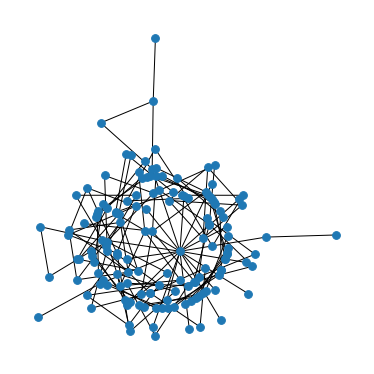

In [4]:
# larger figure size
plt.figure(3,figsize=(5,5)) 
nx.draw_kamada_kawai(G, node_size=60, font_size=8, with_labels = False)
#print(G.number_of_nodes())
plt.show()

Now we are examining the graph under the aspect of communities:

45


<function matplotlib.pyplot.show(close=None, block=None)>

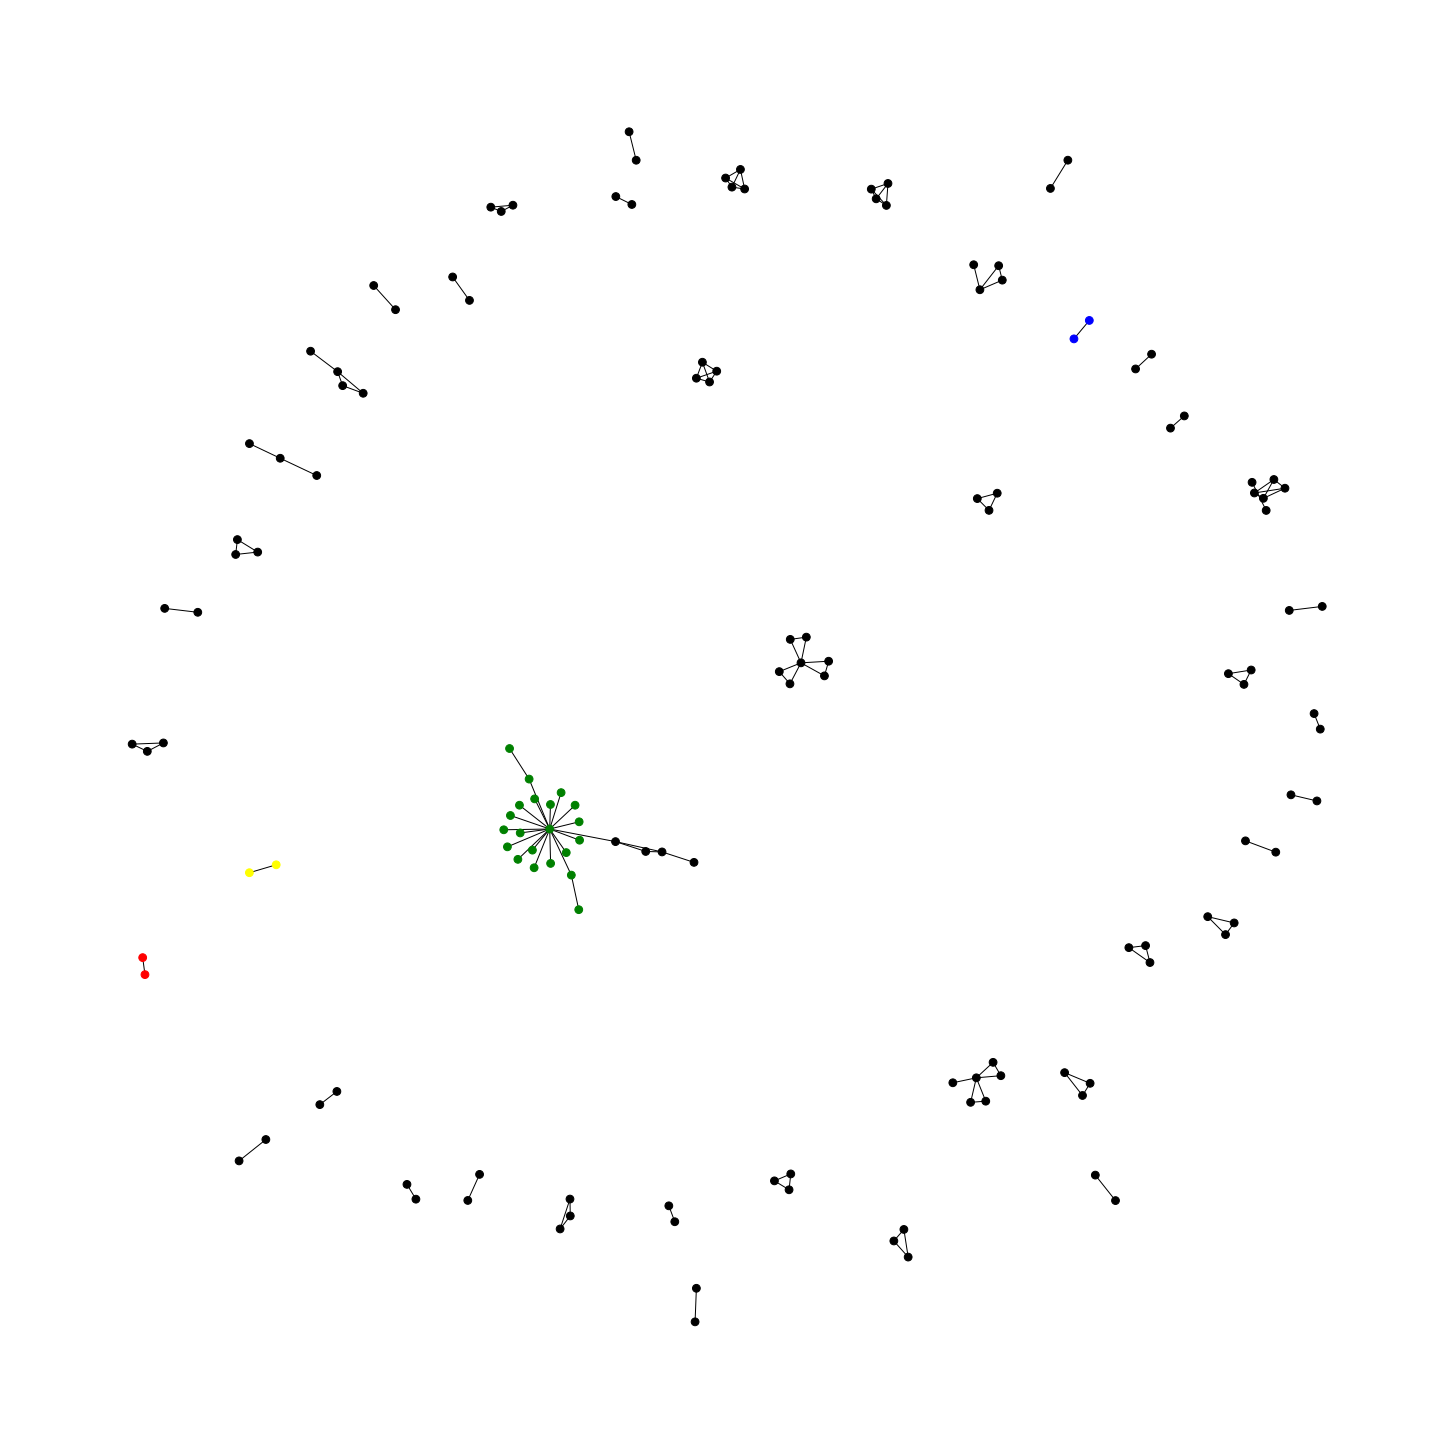

In [5]:
from networkx.algorithms import community
communities = community.girvan_newman(G)
node_groups = []
for com in next(communities):
    node_groups.append(list(com))
#print(node_groups)
print(len(node_groups))
color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append('blue')
    elif node in node_groups[1]:
        color_map.append('green')
    elif node in node_groups[2]:
        color_map.append('yellow')
    elif node in node_groups[3]:
        color_map.append('red')
    else:
        color_map.append('black')

plt.figure(3,figsize=(20,20)) 
nx.draw_spring(G, node_size=60, font_size=8, with_labels = False, node_color=color_map, width = 1)
plt.show

In [6]:
titles = data['Title'].to_list()
papers = set(titles)
print(len(papers))

700


Now let us work with the titles a little bit:

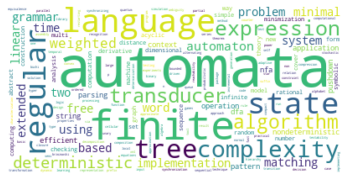

In [7]:
from wordcloud import WordCloud, STOPWORDS

title_string = ''
for paper in papers:
    title_string += (' '+str(paper))
title_string = title_string.lower()
titlecloud = WordCloud(background_color='white', collocations=False).generate(title_string)
plt.imshow(titlecloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Tokenizing
...and removing stopwords

In [59]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords

tokenized = word_tokenize(title_string)
stop_words = set(stopwords.words('english'))

filtered_list = [
    word for word in tokenized if word not in stop_words and word not in ['.',',',':','!','?','(',')']
]
filtered_list

['memoized',
 'regular',
 'expressions',
 'tiburon',
 'weighted',
 'tree',
 'automata',
 'toolkit',
 'typed',
 'linear',
 'algebra',
 'weigthed',
 'probabilistic',
 'automata',
 'uniformization',
 'theorem',
 'nested',
 'word',
 'word',
 'transductions',
 'forest',
 'fire',
 'taxonomy-based',
 'toolkit',
 'tree',
 'automata',
 'regular',
 'tree',
 'algorithms',
 'multiflex',
 'multilingual',
 'finite-state',
 'tool',
 'multi-word',
 'units',
 'gaining',
 'power',
 'input',
 'operations',
 'finite',
 'automata',
 'beyond',
 'number',
 'active',
 'states',
 'deterministic',
 'nondeterministic',
 'finite',
 'automata',
 'range',
 'state',
 'complexities',
 'languages',
 'resulting',
 'cascade',
 'product',
 '-',
 'unary',
 'case',
 'extended',
 'abstract',
 'tabulation',
 'bidirectional',
 'push',
 'automata',
 'tree',
 'template',
 'matching',
 'ranked',
 'ordered',
 'trees',
 'pushdown',
 'automata',
 'enhancing',
 'approximations',
 'regular',
 'reachability',
 'analysis',
 'compressin

### Stemming

In [41]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
stemmed_words = [stemmer.stem(word) for word in filteret_list]

### Frequency

In [50]:
import nltk

freq = nltk.FreqDist(stemmed_words)
total_word_count = sum(freq.values())
top_25 = freq.most_common(25)
for word in top_25:
    norm_freq = word[1] / 275
    print("{} \t\t\t {:.4}".format(word[0], norm_freq))

automata 			 1.0
finit 			 0.3527
languag 			 0.3382
regular 			 0.2945
complex 			 0.1855
tree 			 0.1818
express 			 0.1745
transduc 			 0.1636
state 			 0.16
algorithm 			 0.1564
weight 			 0.1382
determinist 			 0.1382
minim 			 0.1236
implement 			 0.1236
comput 			 0.1164
finite-st 			 0.1091
use 			 0.1091
automaton 			 0.1091
gener 			 0.09818
problem 			 0.09091
system 			 0.09091
grammar 			 0.08727
extend 			 0.08364
match 			 0.08364
word 			 0.07273


Let us now try to include bigrams into our research.

In [63]:
from nltk.util import bigrams

string_bigrams = list(nltk.bigrams(filtered_list))

3858